In [70]:
# Import necessary libraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings

# Import scikit-learn metrics module for model evaluation
from sklearn import metrics

# Import TensorFlow and Keras for building and training neural networks
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense 
from tensorflow.keras.layers import Dropout, BatchNormalization
from keras.callbacks import EarlyStopping

# Set display options for pandas and suppress warnings
pd.set_option('display.max_columns', 100)
warnings.filterwarnings('ignore')

In [71]:
# Read the dataset from a CSV file into a Pandas DataFrame

data = pd.read_csv('diabetes.csv')

In [72]:
# Create a copy of the original DataFrame for further processing

df = data.copy()

In [73]:
# Display information about the DataFrame, including data types and non-null counts

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

In [74]:
for col in df.columns:
    counts = df[col].value_counts()
    print(counts)
    print('----------------------')

Age
35    30
48    28
30    25
43    25
40    24
55    22
47    21
38    20
53    20
45    18
58    18
50    18
54    16
39    16
57    15
60    15
68    10
28     9
42     9
72     9
66     9
36     8
61     8
56     8
46     8
67     8
62     7
37     7
49     7
44     7
27     6
34     6
65     6
32     5
69     5
51     5
70     5
64     5
33     4
59     4
41     4
52     4
63     3
31     3
90     2
85     2
25     2
79     1
16     1
29     1
26     1
Name: count, dtype: int64
----------------------
Gender
Male      328
Female    192
Name: count, dtype: int64
----------------------
Polyuria
No     262
Yes    258
Name: count, dtype: int64
----------------------
Polydipsia
No     287
Yes    233
Name: count, dtype: int64
----------------------
sudden weight loss
No     303
Yes    217
Name: count, dtype: int64
----------------------
weakness
Yes    305
No     215
Name: count, dtype: int64
----------------------
Polyphagia
No     283
Yes    237
Name: count, dtype: int64
-------------

## **EDA**

In [75]:
diabetes_df = df[df['class'] == 'Positive']

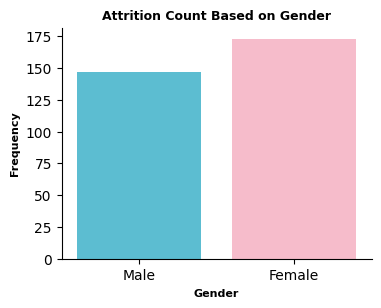

In [76]:
# Visualizing Attrition Count Based on Gender using a Pie Chart
plt.figure(figsize=(4,3))

sns.countplot(x='Gender', data=diabetes_df, palette=['#48cae4', '#ffb3c6'])
plt.title('Attrition Count Based on Gender', fontdict={'fontsize' : 9, 'weight' : 'bold'})
plt.xlabel('Gender', fontdict={'fontsize' : 8, 'weight' : 'bold'})
plt.ylabel('Frequency', fontdict={'fontsize' : 8, 'weight' : 'bold'})
sns.despine()
plt.show()

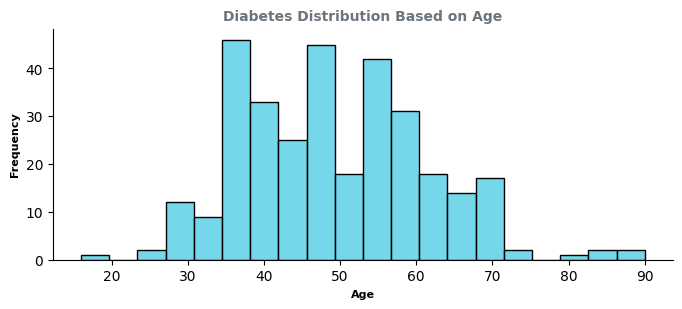

In [77]:
# Creating a histogram to visualize the Diabetes Distribution Based on Age.
plt.figure(figsize=(8,3))

sns.histplot(x='Age', data=diabetes_df, bins=20, color='#48cae4')
plt.title('Diabetes Distribution Based on Age', fontdict={'fontsize' : 10, 'weight' : 'bold', 'color' : '#6c757d'})
plt.xlabel('Age', fontdict={'fontsize' : 8, 'weight' : 'bold'})
plt.ylabel('Frequency', fontdict={'fontsize' : 8, 'weight' : 'bold'})

sns.despine()
plt.show()

In [78]:
# Selecting columns with data type 'object' from the DataFrame.

obj_cols = df.select_dtypes(include='object').columns

In [79]:
# Using LabelEncoder to encode categorical columns with 'object' data type in the DataFrame.

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

for col in obj_cols:
    df[col] = encoder.fit_transform(df[col])

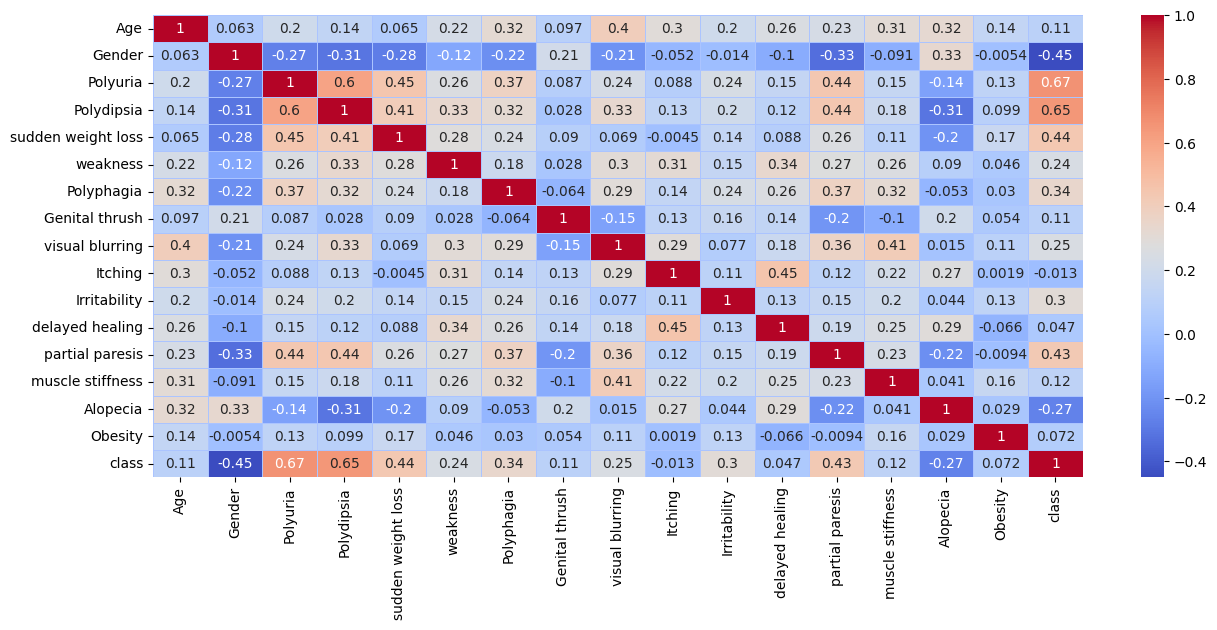

In [80]:
# Create a heatmap of the correlation matrix of the DataFrame 'df'
plt.figure(figsize=(15,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linecolor='#abc4ff', linewidths=0.5)

plt.show()

In [81]:
# Splitting the DataFrame into features (x) and target variable (y).

x = df.drop(columns=['class'])
y = df['class']

In [82]:
# Splitting the dataset into training and testing sets using train_test_split.

from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=4)

In [83]:
# Printing the shapes of the training and testing sets to verify the data splitting.

print(f'Shape of xtrain : {xtrain.shape}')
print(f'Shape of xtest : {xtest.shape}')
print(f'Shape of ytrain : {ytrain.shape}')
print(f'Shape of ytest : {ytest.shape}')

Shape of xtrain : (416, 16)
Shape of xtest : (104, 16)
Shape of ytrain : (416,)
Shape of ytest : (104,)


In [133]:
# Creating a Sequential model for binary classification.
Model = Sequential()

# Adding the Input layer with 32 units, ReLU activation, and input dimension of 14.
Model.add(Dense(units=32, activation='relu', input_dim=16))
Model.add(BatchNormalization())

# Adding the Hidden layers with ReLU activation.
Model.add(Dense(units=64, activation='relu'))
Model.add(Dropout(0.4))

Model.add(Dense(units=128, activation='relu'))
Model.add(Dropout(0.4))

# Adding the output layer with 1 unit and sigmoid activation for binary classification.
Model.add(Dense(units=1, activation='sigmoid'))

# Compiling the model using the Adam optimizer and binary crossentropy loss.
Model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [134]:
# Creating an EarlyStopping callback to halt training when accuracy stops improving.

early_stop = EarlyStopping(monitor='accuracy', patience=10, verbose=0, restore_best_weights=True)

In [144]:
# Training the model on the training data with a specified number of epochs, batch size, and early stopping callback.

Model.fit(xtrain, ytrain, epochs=20, batch_size=32, callbacks=[early_stop])

Epoch 1/20
13/13 [==============================] - 0s 8ms/step - loss: 0.0399 - accuracy: 0.9856
Epoch 2/20
13/13 [==============================] - 0s 6ms/step - loss: 0.0575 - accuracy: 0.9688
Epoch 3/20
13/13 [==============================] - 0s 10ms/step - loss: 0.0560 - accuracy: 0.9760
Epoch 4/20
13/13 [==============================] - 0s 10ms/step - loss: 0.0287 - accuracy: 0.9904
Epoch 5/20
13/13 [==============================] - 0s 8ms/step - loss: 0.0500 - accuracy: 0.9784
Epoch 6/20
13/13 [==============================] - 0s 9ms/step - loss: 0.0718 - accuracy: 0.9736
Epoch 7/20
13/13 [==============================] - 0s 6ms/step - loss: 0.0388 - accuracy: 0.9856
Epoch 8/20
13/13 [==============================] - 0s 8ms/step - loss: 0.0433 - accuracy: 0.9832
Epoch 9/20
13/13 [==============================] - 0s 9ms/step - loss: 0.0452 - accuracy: 0.9832
Epoch 10/20
13/13 [==============================] - 0s 6ms/step - loss: 0.0687 - accuracy: 0.9736
Epoch 11/20
13/13

In [145]:
# Evaluate the model on the train set and retrieve the train accuracy

train_accuracy = Model.evaluate(xtrain, ytrain)
print(f'The Training Accuracy : {round(train_accuracy[1], 2) * 100}%')

13/13 [==============================] - 0s 5ms/step - loss: 0.0300 - accuracy: 0.9976
The Training Accuracy : 100.0%


In [146]:
# Evaluate the model on the test set and retrieve the test accuracy

test_accuracy = Model.evaluate(xtest, ytest)
print(f'The Testing Accuracy : {round(test_accuracy[1], 2) * 100}%')

4/4 [==============================] - 0s 4ms/step - loss: 0.1672 - accuracy: 0.9904
The Testing Accuracy : 99.0%


In [147]:
# Prediction on Training set
train_pred_prob = Model.predict(xtrain)

# Convert the predictions to binary predictions (0 or 1) using a threshold
threshold = 0.5
train_pred_binary = (train_pred_prob > threshold).astype('int')

print('Classification Report for Training Set\n')
print(metrics.classification_report(ytrain, train_pred_binary))

13/13 [==============================] - 1s 7ms/step
Classification Report for Training Set

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       157
           1       1.00      1.00      1.00       259

    accuracy                           1.00       416
   macro avg       1.00      1.00      1.00       416
weighted avg       1.00      1.00      1.00       416



In [148]:
# Prediction on Testing set
test_pred_prob = Model.predict(xtest)

# Convert the predictions to binary predictions (0 or 1) using a threshold
threshold = 0.5
test_pred_binary = (test_pred_prob > threshold).astype('int')

print('Classification Report for Testing Set\n')
print(metrics.classification_report(ytest, test_pred_binary))

4/4 [==============================] - 0s 5ms/step
Classification Report for Testing Set

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.98      1.00      0.99        61

    accuracy                           0.99       104
   macro avg       0.99      0.99      0.99       104
weighted avg       0.99      0.99      0.99       104



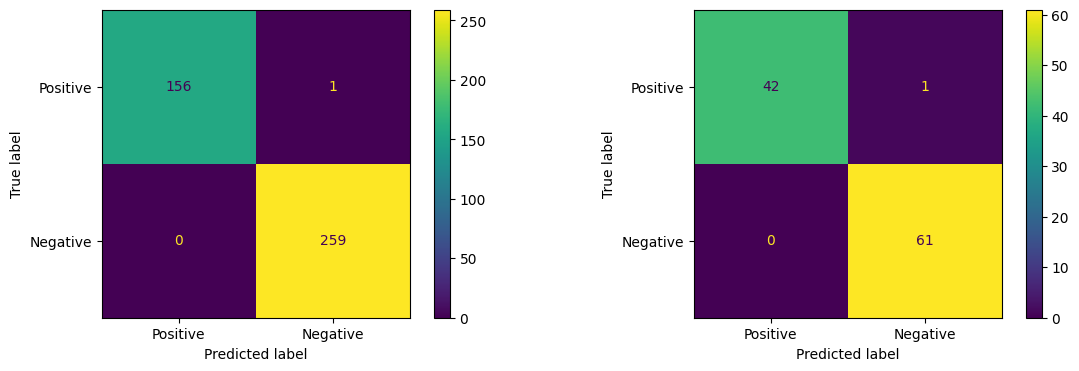

In [149]:
# Creating a Confusion Matrix
cm_train = metrics.confusion_matrix(ytrain, train_pred_binary)
cm_test = metrics.confusion_matrix(ytest, test_pred_binary)

# Creating ConfusionMatrixDisplay object

cm_train_dis = metrics.ConfusionMatrixDisplay(cm_train, display_labels=['Positive', 'Negative'])
cm_test_dis = metrics.ConfusionMatrixDisplay(cm_test, display_labels=['Positive', 'Negative'])

fig, axs = plt.subplots(1, 2, figsize=(14,4))

cm_train_dis.plot(ax=axs[0])
cm_test_dis.plot(ax=axs[1])

plt.show()

## **Testing**

In [99]:
class_labels = ['Positive', 'Negative']

encoder.fit(class_labels)

LabelEncoder()

In [100]:
# Creating a test DataFrame by concatenating features (xtest) and target variable (ytest) along the columns.

test_df = pd.concat([xtest, ytest], axis=1)

In [114]:
sample_record = test_df[test_df['class'] == 1].sample(1)
sample_record

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
175,30,0,1,0,1,1,1,0,0,0,0,1,0,0,0,0,1


In [115]:
sample = sample_record.drop(columns=['class'])

In [116]:
# Function for making predictions using the trained model.

def Predict(features):

    pred_prob = Model.predict(features)

    threshold = 0.5
    pred_prob_binary = (pred_prob > threshold).astype('int')

    pred_class = encoder.inverse_transform(pred_prob_binary)

    return pred_class

Predict(sample)

1/1 [==============================] - 0s 43ms/step


array(['Positive'], dtype='<U8')